--- Step 1: Simulating E-Commerce Dataset ---
✅ Dataset simulated successfully with 115,116 records.

--- Step 2: Extracting Key Business Insights ---

📌 Customer Segment Performance:
                 TotalRevenue  TotalProfit  UniqueCustomers
CustomerSegment                                            
Bargain Hunter     11250915.0    4479477.0              205
New Customer        8513980.0    3387902.0              153
Loyal Customer      7728615.0    3075358.0              142

📌 Promotion Impact: Average units sold on promotion is 3.46, vs. 2.25 without.

📌 Seasonal Trend: Peak sales month is 7 with revenue of $2,767,258.

--- Step 3: Training Sales Forecasting Model ---
✅ Sales forecasting model trained successfully.

--- Step 4: Visualizing Performance and Trends ---


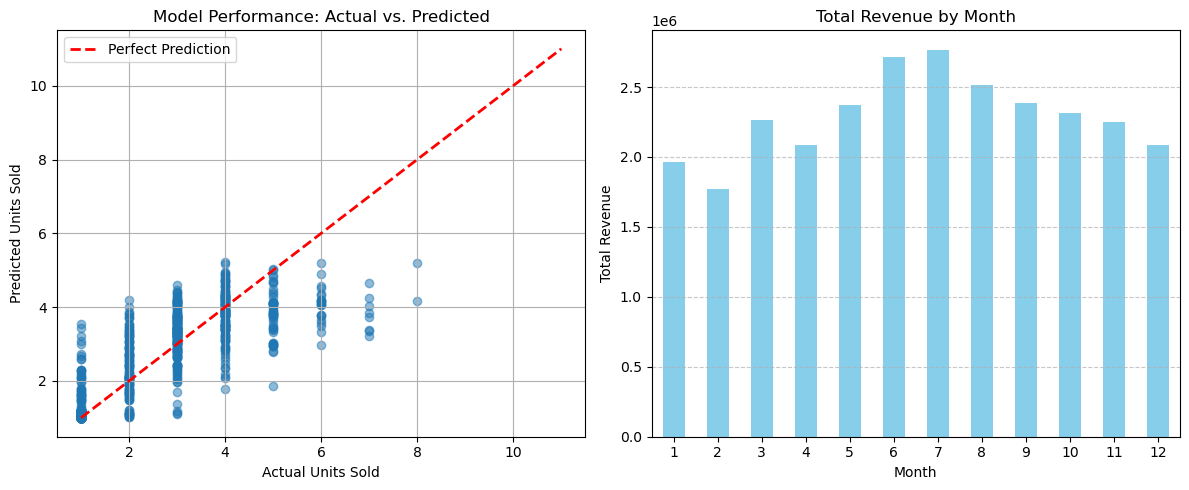


--- Step 5: Running Pricing Simulation ---

📈 Simulated Revenue with +10% Price Increase:
Category
Beauty & Personal Care     3097821.0
Books                      1132194.0
Clothing                   3054509.0
Electronics               11778018.0
Home Goods                 2287225.0
Sports & Outdoors          1724185.0
Toys                       1648471.0
Name: SimulatedRevenue, dtype: float64


In [7]:
# Comprehensive E-Commerce Analytics & Price Optimization Engine
#
# This script simulates a detailed e-commerce dataset and performs a multi-faceted analysis covering
# customer insights, product performance, marketing, seasonality, and price optimization.

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# --- Configuration & Setup ---
warnings.filterwarnings("ignore")
print("--- Step 1: Simulating E-Commerce Dataset ---")

# Define the scale and parameters of our simulated world
n_days, n_products, n_customers, n_regions = 365, 100, 500, 4

categories = [
    'Electronics', 'Clothing', 'Home Goods', 'Books',
    'Beauty & Personal Care', 'Sports & Outdoors', 'Toys'
]
regions = {f"Region_{i+1}": np.random.uniform(0.8, 1.2) for i in range(n_regions)}
customer_segments = ['Loyal Customer', 'Bargain Hunter', 'New Customer']

# Define the "rules" for each product category
category_info = {
    'Electronics': {'base_price': 500, 'base_sales': 1, 'elasticity': -2.5, 'seasonality': 1.5},
    'Clothing': {'base_price': 75, 'base_sales': 2, 'elasticity': -1.8, 'seasonality': 2.0},
    'Home Goods': {'base_price': 150, 'base_sales': 1, 'elasticity': -1.2, 'seasonality': 1.2},
    'Books': {'base_price': 25, 'base_sales': 3, 'elasticity': -0.8, 'seasonality': 1.8},
    'Beauty & Personal Care': {'base_price': 40, 'base_sales': 4, 'elasticity': -0.9, 'seasonality': 1.1},
    'Sports & Outdoors': {'base_price': 200, 'base_sales': 1, 'elasticity': -1.5, 'seasonality': 1.9},
    'Toys': {'base_price': 50, 'base_sales': 2, 'elasticity': -2.1, 'seasonality': 2.5}
}

# --- Data Generation ---
# Create reference tables for customers and products
customers = pd.DataFrame({
    'CustomerID': [f"Cust_{i}" for i in range(100, 100 + n_customers)],
    'CustomerSegment': np.random.choice(customer_segments, n_customers, p=[0.3, 0.4, 0.3]),
    'Region': np.random.choice(list(regions.keys()), n_customers)
})

products = pd.DataFrame({
    'ProductID': [f"SKU_{i}" for i in range(1000, 1000 + n_products)],
    'Category': np.random.choice(categories, n_products)
})

# Simulate daily transactions
transactions = []
for day in range(n_days):
    date = pd.to_datetime("2024-01-01") + pd.Timedelta(days=day)
    month = date.month
    
    for _ in range(np.random.randint(150, 500)): # Simulate 150-500 transactions per day
        product = products.sample(1).iloc[0]
        customer = customers.sample(1).iloc[0]
        info = category_info[product['Category']]
        
        # Calculate dynamic factors for this transaction
        seasonality = 1 + (info['seasonality'] - 1) * (np.sin((month - 1) * (np.pi / 6) - np.pi / 2) + 1) / 2
        base_price = np.random.normal(info['base_price'], 0.2 * info['base_price'])
        cost = base_price * np.random.uniform(0.5, 0.7)
        price = base_price * (1 + np.random.normal(0, 0.05))
        is_on_promotion = np.random.choice([True, False], p=[0.1, 0.9])
        promotion_multiplier = 1.5 if is_on_promotion else 1.0
        
        # Calculate final units sold based on all factors
        demand_effect = (price / base_price) ** info['elasticity']
        units_sold = int(info['base_sales'] * demand_effect * seasonality * regions[customer['Region']] * promotion_multiplier * (1 + np.random.normal(0, 0.1)))
        units_sold = max(1, units_sold)

        transactions.append([
            date, product['ProductID'], product['Category'], cost, price,
            price * np.random.uniform(0.95, 1.05), units_sold, customer['CustomerID'],
            customer['CustomerSegment'], customer['Region'], is_on_promotion
        ])

# Create the final DataFrame
columns = ['Date', 'ProductID', 'Category', 'Cost', 'Price', 'CompetitorPrice', 'UnitsSold',
           'CustomerID', 'CustomerSegment', 'Region', 'IsOnPromotion']
df = pd.DataFrame(transactions, columns=columns)
df['Revenue'] = df['Price'] * df['UnitsSold']
df['Profit'] = (df['Price'] - df['Cost']) * df['UnitsSold']

print(f"✅ Dataset simulated successfully with {len(df):,} records.\n")

# --- 2. Key Business Insights ---
print("--- Step 2: Extracting Key Business Insights ---")

# a. Customer Segment Performance
segment_summary = df.groupby('CustomerSegment').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalProfit=('Profit', 'sum'),
    UniqueCustomers=('CustomerID', 'nunique')
).sort_values('TotalRevenue', ascending=False)
print("\n📌 Customer Segment Performance:")
print(segment_summary.round(0))

# b. Product Performance & Promotion Impact
promotion_impact = df.groupby('IsOnPromotion')['UnitsSold'].mean()
print(f"\n📌 Promotion Impact: Average units sold on promotion is {promotion_impact[True]:.2f}, vs. {promotion_impact[False]:.2f} without.")

# c. Seasonal Trends
df['Month'] = df['Date'].dt.month
monthly_revenue = df.groupby('Month')['Revenue'].sum()
peak_month = monthly_revenue.idxmax()
print(f"\n📌 Seasonal Trend: Peak sales month is {peak_month} with revenue of ${monthly_revenue.max():,.0f}.")

# --- 3. Sales Forecasting Model ---
print("\n--- Step 3: Training Sales Forecasting Model ---")
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['Date'].dt.dayofweek

features = ['Price', 'CompetitorPrice', 'Month', 'Week', 'DayOfWeek']
X, y = df[features], df['UnitsSold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=-1, objective='reg:squarederror')
model.fit(X_train, y_train, verbose=False)
print("✅ Sales forecasting model trained successfully.")

# --- 4. Visualizations ---
print("\n--- Step 4: Visualizing Performance and Trends ---")

# a. Model Performance Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sample_indices = np.random.choice(len(y_test), min(1000, len(y_test)), replace=False)
plt.scatter(np.array(y_test)[sample_indices], model.predict(X_test)[sample_indices], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.title("Model Performance: Actual vs. Predicted")
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.grid(True)
plt.legend()

# b. Monthly Revenue Trend Plot
plt.subplot(1, 2, 2)
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- 5. Price Simulation ---
print("\n--- Step 5: Running Pricing Simulation ---")
def simulate_price_change(df, model, percentage_change):
    temp_df = df.copy()
    temp_df['SimulatedPrice'] = temp_df['Price'] * (1 + percentage_change)
    temp_df['Price'] = temp_df['SimulatedPrice'] # Update price for prediction
    
    predicted_units = model.predict(temp_df[features]).clip(0).astype(int)
    temp_df['SimulatedRevenue'] = temp_df['SimulatedPrice'] * predicted_units
    
    return temp_df.groupby('Category')['SimulatedRevenue'].sum()

# Simulate a +10% price increase
simulated_revenue_plus_10 = simulate_price_change(df, model, 0.10)
print("\n📈 Simulated Revenue with +10% Price Increase:")
print(simulated_revenue_plus_10.round(0))


